#### This File Performs Data Cleaning Operations and Adds Two New Columns in the Dataset
---
COLUMNS NAMES: words_count, tld_in_path_rest

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import re

## Importing the dataset

In [2]:
dataset = pd.read_csv('../combined_csv.csv')

## Preview

In [3]:
dataset.head()

,URL,subdomain,domain,tld,path_rest,url_length,path_rest_length,num_spcs_chars,domain_entropy,domain_age,created_year,updated_year,expires_year,country_code,Label
0,ztipptops.org/pCntrlde/webscr.php?cmd_=session...,org,ztipptops.org,org,pCntrlde/webscr.php?cmd_=session.start&amp;sdr...,98.0,84.0,0.0,3.026987,NaN,NaN,NaN,NaN,NaN,bad
1,krotzons.com/aG9tb3RoLmhub0B0LW9ubGluZS5kZQ==/...,com,krotzons.com,com,aG9tb3RoLmhub0B0LW9ubGluZS5kZQ==/DEsdR/cgi1unp...,70.0,57.0,0.0,3.188722,NaN,NaN,NaN,NaN,NaN,bad
2,www.gorconsul.ru/plugins/paypal.com/webscr/m/e...,ru,www.gorconsul.ru,ru,plugins/paypal.com/webscr/m/e/q/p/z/x/j/id=102...,77.0,60.0,0.0,3.202820,NaN,NaN,NaN,NaN,NaN,bad
3,krotzons.com/am9iYWJlcm5lckB0LW9ubGluZS5kZQ==/...,com,krotzons.com,com,am9iYWJlcm5lckB0LW9ubGluZS5kZQ==/DEsdR/cgiq5pd...,70.0,57.0,0.0,3.188722,NaN,NaN,NaN,NaN,NaN,bad
4,paypal.us.xn-----vldfgifeq7dua2hckj.net/webscr...,net,paypal.us.xn-----vldfgifeq7dua2hckj.net,net,webscr.php?cmd=_login-run&dispatch=5885d80a13c...,203.0,163.0,0.0,4.384904,NaN,NaN,NaN,NaN,NaN,bad


In [4]:
dataset.shape

(2433, 15)

In [5]:
dataset[['URL', 'domain', 'tld', 'path_rest', 'created_year', 'updated_year', 'expires_year', 'country_code', 'Label']] = dataset[['URL', 'domain', 'tld', 'path_rest', 'created_year', 'updated_year', 'expires_year', 'country_code', 'Label']].astype("string")

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2433 entries, 0 to 2432
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   URL               2433 non-null   string 
 1   subdomain         2433 non-null   object 
 2   domain            2433 non-null   string 
 3   tld               2433 non-null   string 
 4   path_rest         2235 non-null   string 
 5   url_length        2433 non-null   float64
 6   path_rest_length  2433 non-null   float64
 7   num_spcs_chars    2433 non-null   float64
 8   domain_entropy    2433 non-null   float64
 9   domain_age        967 non-null    float64
 10  created_year      1006 non-null   string 
 11  updated_year      936 non-null    string 
 12  expires_year      966 non-null    string 
 13  country_code      781 non-null    string 
 14  Label             2433 non-null   string 
dtypes: float64(5), object(1), string(9)
memory usage: 285.2+ KB


In [7]:
dataset.dtypes

URL                 string[python]
subdomain                   object
domain              string[python]
tld                 string[python]
path_rest           string[python]
url_length                 float64
path_rest_length           float64
num_spcs_chars             float64
domain_entropy             float64
domain_age                 float64
created_year        string[python]
updated_year        string[python]
expires_year        string[python]
country_code        string[python]
Label               string[python]
dtype: object

In [8]:
dataset['created_year'].value_counts()

created_year
2009      65
2010      53
2022      50
2007      48
2008      45
          ..
2012.0     1
18-S       1
31-J       1
03-D       1
12.1       1
Name: count, Length: 77, dtype: Int64

In [9]:
dataset['tld'].value_counts()

tld
com    1081
net     177
uk      136
org     111
ru       94
       ... 
nz        1
pk        1
ma        1
ps        1
tl        1
Name: count, Length: 100, dtype: Int64

In [10]:
dataset['tld'].value_counts()

tld
com    1081
net     177
uk      136
org     111
ru       94
       ... 
nz        1
pk        1
ma        1
ps        1
tl        1
Name: count, Length: 100, dtype: Int64

In [11]:
dataset.isnull().sum()

URL                    0
subdomain              0
domain                 0
tld                    0
path_rest            198
url_length             0
path_rest_length       0
num_spcs_chars         0
domain_entropy         0
domain_age          1466
created_year        1427
updated_year        1497
expires_year        1467
country_code        1652
Label                  0
dtype: int64

## Data Cleaning

In [12]:
columns_to_strip = ['URL', 'domain', 'tld', 'path_rest', 'created_year', 'updated_year', 'expires_year', 'country_code', 'Label']
dataset[columns_to_strip] = dataset[columns_to_strip].applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [13]:
# Assuming 'dataset' is your DataFrame
values_to_remove = ['Mon', 'Wed', 'Thu', '01 S', '28-A', '06-J', '03-D', '31-J', '18-O', '19-J', '12.1', 'Wed', 'Mon', '19/0', '17-M', '12-A', '18-A', '21-F', '24', '18-S', '6']
dataset = dataset[~dataset['created_year'].isin(values_to_remove)]

In [14]:
dataset = dataset[dataset['expires_year'] != 'spon']

In [15]:
columns_to_fillna = ['created_year', 'updated_year', 'expires_year', 'country_code']
dataset[columns_to_fillna] = dataset[columns_to_fillna].fillna(-1)
dataset['domain_age'] = dataset['domain_age'].fillna(-1)
# dataset['domain_age'] = dataset['domain_age'].fillna(0) #Check later if keeping this as zero has any impact on accuracy

In [16]:
dataset['domain_entropy'] = dataset['domain_entropy'].round(2)

In [17]:
columns_to_convert = ['created_year', 'updated_year', 'expires_year']

for column in columns_to_convert:
    dataset[column] = pd.to_numeric(dataset[column], errors='coerce').fillna(-1).astype(int)

In [18]:
dataset[['URL', 'domain', 'tld', 'path_rest', 'country_code', 'Label']] = dataset[['URL', 'domain', 'tld', 'path_rest', 'country_code', 'Label']].astype("string")
dataset.dtypes

URL                 string[python]
subdomain                   object
domain              string[python]
tld                 string[python]
path_rest           string[python]
url_length                 float64
path_rest_length           float64
num_spcs_chars             float64
domain_entropy             float64
domain_age                 float64
created_year                 int32
updated_year                 int32
expires_year                 int32
country_code        string[python]
Label               string[python]
dtype: object

## Importing Data For Bad URL Words

### Importing Data From Text Files And Storing Data in List

In [19]:
def read_words_from_file(file_name):
  with open(file_name, 'r') as file:
    words = [line.strip().split(',')[0].strip("('") for line in file]
  return words

def combine_lists(list1, list2):
  return list(set(list1 + list2))

words_only_in_bad_urls_file = '../extracted_information/bad_url/words_only_in_bad_urls.txt'
words_in_common_greater_than_70_file = '../extracted_information/bad_url/words_in_common_greater_than_70.txt'

# Read words from both files
words_only_in_bad_urls = read_words_from_file(words_only_in_bad_urls_file)
words_in_common_greater_than_70 = read_words_from_file(words_in_common_greater_than_70_file)

# Combine the lists
all_words_list = combine_lists(words_only_in_bad_urls, words_in_common_greater_than_70)

print(all_words_list)

['jxjy', 'cg1bin', 'config', 'kayo', 'partnerid', '2dfd', 'rogersmain', 'zielonyogrodek', 'documentl', 'hold', '1u72oid', 'eegl7p', 'secure371', 'hnyhx', 'shannuodianqi', 'lkfashions', 'zjbluesky', 'w2bscrcmd', 'refundhmrc', 'drdavidlinks', 'typo3', 'gimnasia', 'blackhatworld', 'panel2', 'dellassist', 'rebrb45t', '3fsession', 'rict', 'st2', 'totalfitness', 'maplerivertoys', 'framework', 'stavros', 'screaming', 'jcnnhs', 'updateaol', 'myrademo', 'xoom', 'cajpe', 'osteopatiaedor', '2013gdocs', 'natwest', 'ahtjgroup', 'ads', 'chickenkiller', 'nkbm', 'defrgeed32', '09yhbvt4', 'mobilesfree', 'rbc', '1lorawicz', 'mycuisine', 'cndoubleegret', 'lifestylzgh', 'nyawaa', 'mudar', 'verifikation', 'everydaycareer', 'tmb', 'ipregnancyapp', 'uthegrepspar', 'admin2', 'icyte', '2fservicelogin', 'glazypablo', 'montenig', 'gruffcrimp', 'staffkita', 'pygsrnpckgqh2q', 'nuochoare', 'qwertyatwork', 'diamondsd', 'acpf', 'clearlooks2', 'bdb37', 'gerardfetter', 'webbscr', 'bnet', 'gerwinvegter', 'noreplyyahoicc

### Adding New Column For Count Of Bad URL Words Present in the URL

In [20]:
def count_words_in_list(words_list, all_words_list):
    count = 0
    for word in words_list:
        if word in all_words_list:
            count += 1
    return count

# Create a new column with word counts for each URL string
dataset['word_count'] = dataset['URL'].apply(lambda url_string: re.split(r"[/,.,?,-,+,=,&,~,!,@,#,$,%,_,;]", url_string))
dataset['word_count'] = dataset['word_count'].apply(lambda words_list: count_words_in_list(words_list, all_words_list))

# Now 'dataset' will have a new column 'word_count' with the count of words from 'all_words_list' for each URL string
# Reorder the columns in the DataFrame
desired_column_order = list(dataset.columns[:-2]) + ['word_count'] + [dataset.columns[-2]]
dataset = dataset[desired_column_order]

### Analysis of word_count Column

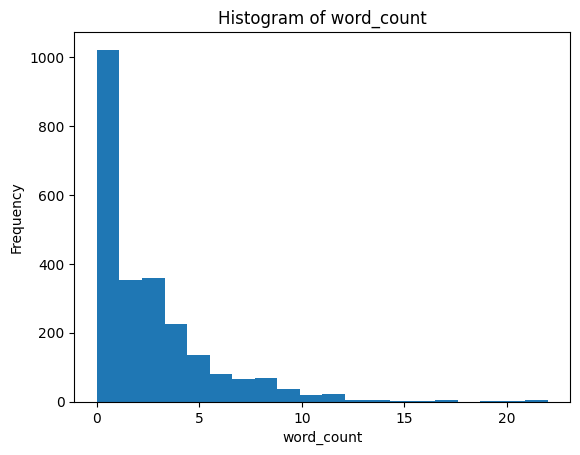

In [21]:
import matplotlib.pyplot as plt

# Plot a histogram of the 'word_count' column
plt.hist(dataset['word_count'], bins=20)
plt.xlabel('word_count')
plt.ylabel('Frequency')
plt.title('Histogram of word_count')
plt.show()


In [22]:
# Calculate descriptive statistics of the 'tld_in_path_rest' column
statistics = dataset['word_count'].describe()
print(statistics)

count    2408.000000
mean        2.760382
std         2.803252
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        22.000000
Name: word_count, dtype: float64


In [23]:
# Calculate the correlation between 'tld_in_path_rest' and 'another_numeric_column'
correlation = dataset['word_count'].corr(dataset['url_length'])
print("Correlation:", correlation)

Correlation: 0.6571874281049584


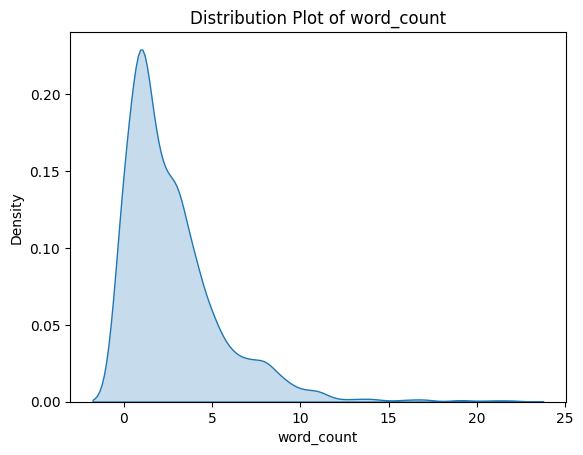

In [24]:
import seaborn as sns

# Plot a distribution plot (Kernel Density Estimation) of the 'word_count' column
sns.kdeplot(dataset['word_count'], fill=True)
plt.xlabel('word_count')
plt.ylabel('Density')
plt.title('Distribution Plot of word_count')
plt.show()

## Importing Top Level Domain in Bad URLs

### Importing Data From Text Files and Storing in List

In [25]:
#NEW 
def read_tuples_from_file(file_path):
  with open(file_path, 'r') as file:
    lines = file.readlines()
  
  tuples_list = []
  for line in lines:
    # Remove parentheses and split the line by comma and whitespace
    word, frequency = line.strip('()\n').split(', ')
    # Remove extra single quotes from the word
    word = word.strip("'")  
    frequency = int(frequency)
    tuples_list.append((word, frequency))

  return tuples_list

file_path = '../extracted_information/bad_url/bad_url_top_level_domains_with_frequency.txt'
tuples_list = read_tuples_from_file(file_path)

print(tuples_list)


[('com', 361638), ('org', 48631), ('net', 23436), ('ca', 10886), ('edu', 10060), ('uk', 8479), ('ru', 6193), ('info', 4366), ('br', 4129), ('au', 4081), ('de', 3185), ('gov', 3038), ('pl', 2686), ('biz', 2319), ('in', 2186), ('it', 2114), ('us', 1851), ('cn', 1800), ('fr', 1747), ('mx', 1508), ('nl', 1463), ('ro', 1290), ('cl', 1196), ('eu', 1155), ('za', 1045), ('asia', 953), ('tk', 950), ('cz', 833), ('es', 790), ('fm', 782), ('top', 750), ('se', 714), ('ar', 691), ('be', 686), ('xyz', 644), ('pw', 633), ('su', 583), ('nz', 580), ('jp', 577), ('ua', 538), ('co', 534), ('hu', 526), ('at', 520), ('me', 513), ('ch', 510), ('dk', 505), ('gr', 440), ('ly', 421), ('tv', 415), ('ir', 413), ('vn', 390), ('cc', 375), ('id', 373), ('work', 373), ('tr', 355), ('ie', 351), ('name', 348), ('to', 341), ('kr', 316), ('pt', 310), ('ws', 292), ('click', 281), ('no', 256), ('by', 253), ('il', 251), ('my', 247), ('kz', 246), ('fi', 233), ('sk', 232), ('si', 211), ('mil', 205), ('mobi', 192), ('com ', 1

### Filter Words having Frequency >= 15

In [26]:
def filter_words_by_frequency(tuples_list, min_frequency):
  filtered_words = []
  for word, frequency in tuples_list:
    if frequency > min_frequency:
      filtered_words.append(word)
  return filtered_words

In [27]:
min_frequency = 14
filtered_words_list = filter_words_by_frequency(tuples_list, min_frequency)
print(filtered_words_list)

['com', 'org', 'net', 'ca', 'edu', 'uk', 'ru', 'info', 'br', 'au', 'de', 'gov', 'pl', 'biz', 'in', 'it', 'us', 'cn', 'fr', 'mx', 'nl', 'ro', 'cl', 'eu', 'za', 'asia', 'tk', 'cz', 'es', 'fm', 'top', 'se', 'ar', 'be', 'xyz', 'pw', 'su', 'nz', 'jp', 'ua', 'co', 'hu', 'at', 'me', 'ch', 'dk', 'gr', 'ly', 'tv', 'ir', 'vn', 'cc', 'id', 'work', 'tr', 'ie', 'name', 'to', 'kr', 'pt', 'ws', 'click', 'no', 'by', 'il', 'my', 'kz', 'fi', 'sk', 'si', 'mil', 'mobi', 'com ', 'th', 'pk', 'sg', 'ph', 'hk', 'lt', 'mn', 'tw', 'rs', 'online', 'gl', 'ae', 'pe', 'nu', 've', 'ke', 'bd', 'ma', 'cf', 'ga', 'mu', 'bg', 'cx', 'onion', 'club', 'lk', 'ml', 'host', 'bo', 'ms', 'ee', 'pro', 'np', 'ng', 'lv', 'cc ', 'ga ', 'gq', 'is', 'uy', 'ge', 'cm', 'am', 'ba', 'COM', 'int', 'hr', 'bid', 'tf', 'xn--p1ai', 'travel', 'vu', 'info ', 'org ', 'tc', 'wang', 'website ', 'co ', 'link', 'ht', 'jobs', 'cat', 'ac', ' net', 'uk ', 'net ', 'tk ', 'az', 'site', 'html', 'gdn', 'io', 'gt', 'space', 'uz', 'so', 'lu', 'sv', 'mk', 'md

### Adding New Column For Count of Top Level Domain in path_rest

In [28]:
def count_words_in_list(words_list, all_words_list):
    count = 0
    for word in words_list:
        # Additional condition to check word length
        if len(word) > 1 and len(word) < 10:
            if word in all_words_list:
                count += 1
    return count

def count_words_in_dataframe(dataframe, filtered_words_list):
    try:
        # Create a new column with word counts for each URL string
        dataframe['tld_in_path_rest'] = dataframe['path_rest'].apply(lambda url_string: re.split(r"[/,.,?,-,+,=,&,~,!,@,#,$,%,_,;]", str(url_string)))
        dataframe['tld_in_path_rest'] = dataframe['tld_in_path_rest'].apply(lambda words_list: count_words_in_list(words_list, filtered_words_list))

    except TypeError:
        # Handle the TypeError when encountering 'NAType' (missing or null values)
        dataframe['tld_in_path_rest'] = 0

    # Reorder the columns in the DataFrame
    desired_column_order = list(dataframe.columns[:-2]) + ['tld_in_path_rest'] + [dataframe.columns[-2]]
    dataframe = dataframe[desired_column_order]

    return dataframe

dataset = count_words_in_dataframe(dataset, filtered_words_list)

### Analysis of tld_in_path_rest Column

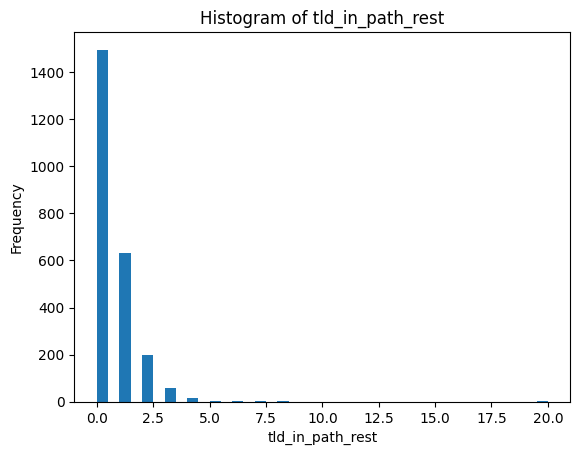

In [29]:
import matplotlib.pyplot as plt

# Plot a histogram of the 'tld_in_path_rest' column
plt.hist(dataset['tld_in_path_rest'], bins=40)
plt.xlabel('tld_in_path_rest')
plt.ylabel('Frequency')
plt.title('Histogram of tld_in_path_rest')
plt.show()


In [30]:
# Calculate descriptive statistics of the 'tld_in_path_rest' column
statistics = dataset['tld_in_path_rest'].describe()
print(statistics)


count    2408.000000
mean        0.546927
std         0.928409
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        20.000000
Name: tld_in_path_rest, dtype: float64


In [31]:
# Calculate the correlation between 'tld_in_path_rest' and 'another_numeric_column'
correlation = dataset['tld_in_path_rest'].corr(dataset['word_count'])
print("Correlation:", correlation)


Correlation: 0.2866331604541855


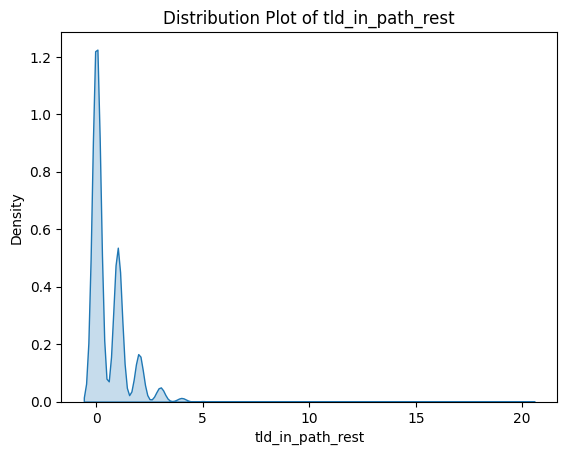

In [32]:
import seaborn as sns

# Plot a distribution plot (Kernel Density Estimation) of the 'tld_in_path_rest' column
sns.kdeplot(dataset['tld_in_path_rest'], fill=True)
plt.xlabel('tld_in_path_rest')
plt.ylabel('Density')
plt.title('Distribution Plot of tld_in_path_rest')
plt.show()


### Dropping Irrelevant Columns

In [33]:
columns_to_remove = ['URL', 'domain', 'path_rest']

# Create a new DataFrame with specified columns removed
df = dataset.drop(columns=columns_to_remove)

In [34]:
column_order = ['tld', 'country_code', 'url_length', 'path_rest_length', 'num_spcs_chars', 'domain_entropy', 'domain_age', 'created_year', 'updated_year', 'expires_year', 'word_count', 'tld_in_path_rest', 'Label']

# Reorder the columns in the DataFrame based on 'column_order'
df = df.reindex(columns=column_order)

In [35]:
file_path = 'final_dataset.csv' 

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)  # Set index=False to exclude the DataFrame's index from the CSV file
